In [16]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt


In [17]:
OmegaM=0.2726   #omega matter, parameter from cosmology
OmegaL= 0.7274  #omega lambda, parameter from cosmology
c = 3e8 #speed of light in km/s
H0 = 67.2 #Hubble constant in km/s/Mpc

In [18]:
# Function to compute comoving distance
def comoving_distance(z): 
    integrand = lambda x: 1./((OmegaM*(1.+x)**3 + OmegaL)**0.5)
    # integrand is the function to integrate from 0 to z

    D_C = integrate.quad(integrand, 0.0, z)[0]  # Perform integration
    D_C *= (c / H0)  # Comoving distance in Mpc
    return D_C  # Return comoving distance

# Function to compute luminosity distance
def luminosity_distance(z):
    D_C = comoving_distance(z)
    return (1 + z) * D_C  # Luminosity distance

# Function to compute lookback time
def lookback_time(z):
    integrand = lambda x: 1.0 / ((1 + x) * np.sqrt(OmegaM * (1 + x)**3 + OmegaL))
    # Perform integration for lookback time from 0 to z
    t_lb = integrate.quad(integrand, 0.0, z)[0]
    t_lb /= H0 
    t_lb /= 3.1536e16  # Convert from seconds to Gyr

    return t_lb  # Return lookba+ck time in Gyr:
    


In [19]:
z = 10.0  # Initial redshift
comov_dist = []  # List to store comoving distances
lum_dist = []  # List to store luminosity distances
look=[] #look-back time list
redsh = []  # List to store redshift values

while z >= 0.0:
    comov_dist.append(comoving_distance(z))  # Call function and store result
    lum_dist.append(luminosity_distance(z))  # Call function and store result
    look.append(lookback_time(z))
    redsh.append(z)  # Store current redshift
    z -= 0.1  # Decrease redshift



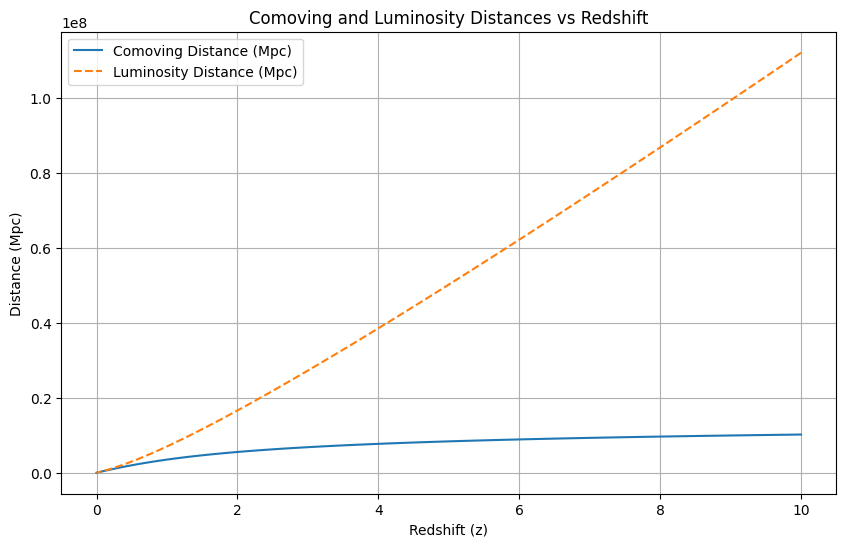

In [20]:
# Plotting comoving and luminosity distances as a function of redshift
plt.figure(figsize=(10, 6))
plt.plot(redsh, comov_dist, label="Comoving Distance (Mpc)")
plt.plot(redsh, lum_dist, label="Luminosity Distance (Mpc)", linestyle="--")
plt.xlabel('Redshift (z)')
plt.ylabel('Distance (Mpc)')
plt.title('Comoving and Luminosity Distances vs Redshift')
plt.legend()
plt.grid(True)
#plt.gca().invert_xaxis()  # Invert x-axis for redshift (from high to low)
plt.show()

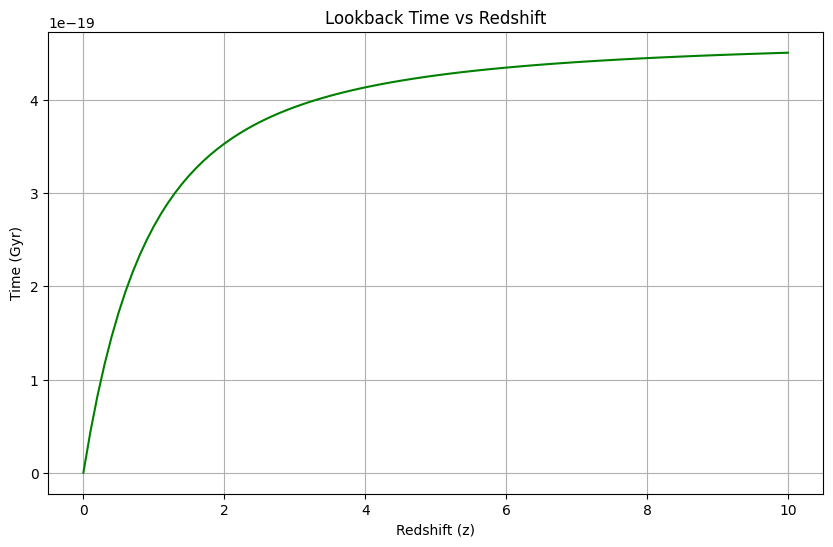

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(redsh, look, label='Lookback Time $t_{lookback}(z)$', color='green')
plt.xlabel('Redshift (z)')
plt.ylabel('Time (Gyr)')
plt.title('Lookback Time vs Redshift')
plt.grid(True)
plt.show()